In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [3]:
from matplotlib.colors import ListedColormap

In [21]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\admin\venvs\mlvenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
from sklearn.model_selection import train_test_split

In [4]:
lx1 = [randint(70,100) for _ in range(42)]
ly1 = [randint(0,100) for _ in range(42)]
list(zip(lx1,ly1))
#x2 = [randint(0,50) for _ in range(42)]
#y2 = [randint(0,45) for _ in range(42)]

[(91, 15),
 (86, 93),
 (87, 65),
 (84, 39),
 (94, 86),
 (71, 84),
 (96, 74),
 (99, 91),
 (73, 20),
 (84, 7),
 (82, 86),
 (87, 97),
 (82, 94),
 (70, 91),
 (83, 29),
 (84, 16),
 (92, 72),
 (79, 67),
 (94, 36),
 (95, 24),
 (84, 3),
 (97, 14),
 (71, 11),
 (95, 53),
 (83, 11),
 (95, 7),
 (74, 33),
 (73, 70),
 (76, 56),
 (83, 26),
 (76, 16),
 (79, 19),
 (86, 98),
 (87, 4),
 (92, 26),
 (73, 5),
 (74, 77),
 (81, 90),
 (75, 100),
 (99, 23),
 (95, 46),
 (93, 40)]

In [161]:
rgen = np.random.RandomState(47)

x1 = rgen.normal(loc=80.0,scale=10.0, size= 42)
y1 = rgen.normal(loc=50.0,scale=18.0, size= 42)

x2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
y2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
k1 = np.array([x1, y1])
k2 = np.array([x2, y2])


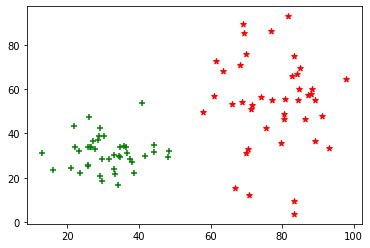

In [162]:
plt.scatter(k1[0], k1[1],  color='red', marker='*', label='class 1')
plt.scatter(k2[0], k2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()


In [191]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                print(update)
                self.w_[1:] += update * xi
                self.w_[0] += update 
                
                errors += int( update != 0.0)
                
            self.errors_.append(errors)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [182]:
kg1 = k1.copy()
kg2 = k2.copy()
k1 = k1.T
k2 = k2.T

In [183]:

X = np.zeros( (84,2) )
X[:42] = k1
X[42:] = k2
#X /= 100 
X

array([[71.51990524, 52.84150052],
       [93.05906358, 33.43284399],
       [89.24207966, 36.57362218],
       [86.40411801, 46.32416439],
       [69.45263017, 85.39492679],
       [97.97760715, 64.82023002],
       [69.8721325 , 30.96528835],
       [88.23623324, 59.91888859],
       [77.05349647, 54.9342185 ],
       [74.07529428, 56.61133636],
       [66.06272941, 53.52600802],
       [91.04179672, 47.95648329],
       [70.67659714, 12.3993129 ],
       [70.56843563, 33.08963813],
       [84.36606232, 54.96525292],
       [87.9495827 , 57.69692343],
       [87.19533153, 57.50143398],
       [80.87662257, 55.43157045],
       [66.77251594, 15.50005225],
       [80.51793979, 46.75869388],
       [61.65204742, 72.85359438],
       [83.27496473,  3.63771117],
       [84.76237234, 60.03835184],
       [81.68428646, 93.00237616],
       [71.37588669, 51.13440969],
       [89.07444498, 55.31372365],
       [84.22889373, 66.95229264],
       [57.87571047, 49.50414448],
       [63.45794259,

In [184]:
# это тест не запускать
#rgen = np.random.RandomState(1)
#w_ = rgen.normal(loc=0.0,scale=0.01, size=X.shape[1])
#np.dot(X[0], w_)
#w_

In [185]:
y = np.ones( (84), dtype=int )
y[:42] = -1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state=1, stratify=y )
X_test

array([[36.5638929 , 31.27114502],
       [68.29141238, 70.76812639]])

In [187]:
X.shape

(84, 2)

In [192]:
ppn = Perceptron( eta=0.01, n_iter=500, random_state=1)

In [193]:
ppn.fit(X_train,y_train)

0.02
0.0
0.0
0.0
-0.02
0.02
0.0
0.02
0.0
0.0
-0.02
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.02
0.02
0.0
0.0
0.0
0.0
0.02
-0.02
0.02
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.02
0.02
0.0
0.0
-0.02
0.0
0.02
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.02
0.0
0.02
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.0
0.02
0.02
0.0
0.02
-0.02
0.02
0.0
0.02
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.02
-0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.0
0.0
-0.02
0.0
0.02
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.02
0.0
0.02
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.0
0.02
0.02
0.0
0.02
-0.02
0.02
0.0
0.02
0.02
0.0
0.0
-0.02
0.0
0.0
0.02
-0.02
0.02
0.0
0.0
0.0
0.02
-0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
-0.02
0.02
0.02
0.02
0.02
-0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.02
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
-0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
-0.02
0.02
0.0
0.02
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.02
0.0
-0.02
0.02
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
-0.02
0.0
0.02
0.0
0.02
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.02
0.0
0.0
0.0
0.02
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
-0.02
0.02
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.02
0.0
-0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
-0.02
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
-0.02
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.0
0.0
0.02
-0.02
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
-0.02
0.0
0.0
0.02
0.0
0.02
0.0
0.0
0.0
-0.02
0.0
0.02
0.02
0.0
0.0
0.0
0.0
0.0

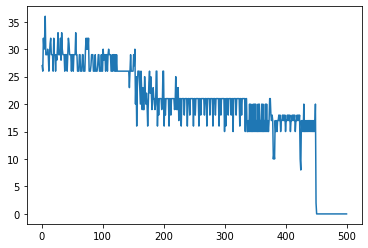

In [194]:
plt.plot(range(1, len(ppn.errors_)+ 1), ppn.errors_ )
plt.show()

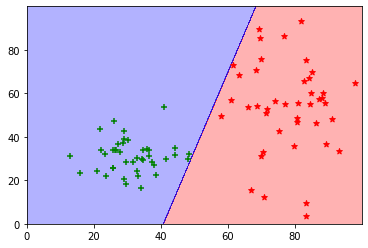

In [195]:
x1_min, x1_max = 0,100
x2_min, x2_max = 0,100
resol = 0.1

cmap = ListedColormap(['red', 'blue'])

xx1, xx2 = np.meshgrid(
                       np.arange(x1_min, x1_max, resol), 
                       np.arange(x2_min, x2_max, resol) 
                      )
Z = ppn.predict(
                np.array([xx1.ravel(), xx2.ravel()] ).T
                )
Z = Z.reshape(xx1.shape)

plt.contourf( xx1, xx2, Z, alpha=0.3, cmap=cmap )
plt.scatter(kg1[0], kg1[1],  color='red', marker='*', label='class 1')
plt.scatter(kg2[0], kg2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()